# Test 2b - Merge, Aggregate, Visualize

## Introduction

This problem tests your ability to merge, aggregate, and visualize data.
You'll work with realistic business data to answer questions about product profitability.

Before submitting, ensure your notebook:

- Includes your verification info (Banner ID and code) as the first cell
- Runs completely with "Kernel → Restart & Run All"
- Shows your work (don't just print final answers)
- Includes your interpretation responses at the end

## Dataset: Bean & Brew Coffee Shop

You've been hired to analyze sales data for Bean & Brew, a local coffee shop chain with three locations. The owner wants to understand which products are most profitable and how profitability varies across locations.

There are two data files:

- `sales.csv` - Individual transaction records
  - `transaction_id`: Unique transaction identifier
  - `timestamp`: Date and time of purchase (format: 'YYYY-MM-DD HH:MM:SS')
  - `location`: Store location ('Downtown', 'Campus', 'Suburb')
  - `product_id`: Product identifier (links to products table)
  - `quantity`: Number of units sold
  - `revenue`: Total revenue from transaction
  - `payment_method`: Payment type ('Cash', 'Credit', 'Mobile')
  - `loyalty_member`: Boolean indicating if customer is loyalty program member
- `products.csv` - Product catalog
  - `product_id`: Unique product identifier
  - `name`: Product name
  - `category`: Product category ('Coffee', 'Tea', 'Pastry', 'Sandwich')
  - `cost`: Cost to make/acquire one unit (for profit calculation)

The dataset contains two weeks of sales data (approximately 3,000 transactions) across 18 products. It includes both regular and premium items in each category.

We are interested in learning which product categories generate the most profit, and how does profitability vary across locations? Complete the following tasks to answer those questions and more.

## Scoring

Total: 30 points (+ 5 bonus)

- Tasks 1-6: 18 points
- Interpretation (Questions 1-4): 12 points
- Bonus: 5 points (optional)

## Generate Your Dataset

Before starting the analysis, you need to generate your unique dataset using your Banner ID.

1. Open a terminal in the folder containing `generate_test2b_data.py`
2. Activate your conda virtual environment
3. Run: `python generate_test2b_data.py`
4. Enter your 9-digit Banner ID when prompted (you'll enter it twice to confirm)

The script will create two files in the `data/` folder:

- `data/products.csv` - Product catalog
- `data/sales.csv` - Transaction records

Important: At the end, the script displays a verification block like this:

```
======================================================================
DATA VERIFICATION INFORMATION
======================================================================
banner id:          904123456
verification code:  5e0dXXXXXXXX
======================================================================
```

Copy the banner id and verification code lines and paste them into the cell below. This is required for submission.


DATA VERIFICATION INFORMATION

banner id:          904360076

verification code:  628734371339

⚠️  Include those two lines at the top of your notebook submission!



## Setup: Load the Data

Run the cell below to load the data. The code is provided for you.

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (provided)
sales = pd.read_csv('data/sales.csv', parse_dates=['timestamp'])
products = pd.read_csv('data/products.csv')

print(f"Sales: {len(sales)} transactions")
print(f"Products: {len(products)} items in catalog")
print()
print("Sales preview:")
sales.head()

Sales: 2711 transactions
Products: 18 items in catalog

Sales preview:


,transaction_id,timestamp,location,product_id,quantity,revenue,payment_method,loyalty_member
0,1001,2025-11-10 06:10:00,Campus,114,1.0,4.62,Credit,False
1,1000,2025-11-10 06:40:00,Downtown,106,1.0,10.12,Mobile,False
2,1002,2025-11-10 06:48:00,Suburb,108,1.0,3.01,Cash,False
3,1003,2025-11-10 06:56:00,Campus,102,1.0,4.38,Mobile,False
4,1017,2025-11-10 07:03:00,Suburb,109,1.0,1.57,Credit,False


In [204]:
# Products catalog
products

,product_id,name,category,cost
0,101,Espresso,Coffee,1.2
1,102,Cappuccino,Coffee,1.8
2,103,Latte,Coffee,1.9
3,104,Americano,Coffee,1.0
4,105,Cold Brew,Coffee,1.5
5,106,Nitro Cold Brew,Coffee,2.5
6,107,Green Tea,Tea,0.8
7,108,Chai Latte,Tea,1.2
8,109,Herbal Tea,Tea,0.7
9,110,Premium Matcha,Tea,2.2


## Task 1: Data Quality Check

Investigate the sales data quality and coverage. Your code should answer the following questions:

1. How many missing values are in each column?
2. How many unique product IDs appear in the sales data? Compare this to the catalog size.
3. What is the date range (earliest and latest transaction)?

### Your Code

In [205]:
# Task 1: use isna(), nunique(), min/max on timestamp
#print(products)
#print(sales['product_id'].value_counts().sort_index())
#199      7
#200      5
#201      1

print("The number of missing data pieces is as follows:\n",sales.isna().sum())

print("The number of unique product ID's is:",sales['product_id'].nunique(), "\nThis is compared to 18 products in the catalog, meaning there was a data entry error.")


print("The first sale occured at: ", sales['timestamp'].min(), "\nThe most recent sale occured at: ", sales['timestamp'].max())

The number of missing data pieces is as follows:
 transaction_id    0
timestamp         0
location          0
product_id        0
quantity          3
revenue           4
payment_method    0
loyalty_member    0
dtype: int64
The number of unique product ID's is: 21 
This is compared to 18 products in the catalog, meaning there was a data entry error.
The first sale occured at:  2025-11-10 06:10:00 
The most recent sale occured at:  2025-11-23 21:14:00


## Task 2: Merge Sales with Products

Merge the sales and products DataFrames to add product information (name, category, cost) to each transaction.

### Your Code

In [206]:
# Task 2: use pd.merge() with appropriate join type
#print(pd.merge(sales, products, 'left').head)
merged_data = pd.merge(sales, products, 'left')

## Task 3: Verify the Merge

After merging, verify that the merge worked correctly:

1. Compare the shape of the merged DataFrame to the original sales data
2. Check if any rows have missing values in the product columns (name, category, cost)
3. If there are missing values, identify which product_id(s) are causing the problem

### Your Code

In [207]:
# Task 3: check shape, isna() on product columns, filter to find problem IDs

print(sales.shape)
print(merged_data.shape)

print("Sales joined with products contains the same number of rows, with 3 addtitional columns\n")

print("The product columns contain the following amounts of missing data:\n", merged_data[['name', 'category', 'cost']].isna().sum()) #13 transactions without name, category, or cost

#print(merged_data[merged_data[['name', 'category', 'cost']].isna().sum(axis = 1)>0])
print("\nThe following product id's are causing problems: \n", merged_data['product_id'][merged_data[['name', 'category', 'cost']].isna().sum(axis = 1)>0].value_counts())



(2711, 8)
(2711, 11)
Sales joined with products contains the same number of rows, with 3 addtitional columns

The product columns contain the following amounts of missing data:
 name        13
category    13
cost        13
dtype: int64

The following product id's are causing problems: 
 product_id
199    7
200    5
201    1
Name: count, dtype: int64


## Task 4: Profit by Category

First, calculate profit for each transaction: `profit = revenue - (cost × quantity)`

Then summarize profitability by product category. Your code should return a table that shows both total profit and number of transactions for each category. Sort it by total profit (highest first).

### Your Code

In [208]:
# Task 4: create profit column, then groupby with .agg()
merged_data['profit'] = merged_data['revenue']-(merged_data['cost'] * merged_data['quantity'])

#print(merged_data[['transaction_id', 'quantity', 'revenue']][merged_data['profit'].isna() & merged_data['category'].notna()])

summary = merged_data.groupby('category').agg(
    total_profit = ('profit', 'sum'),
    num_transactions = ('profit', 'count'))
                                        

#merged_data.head()
#merged_data['quantity'].value_counts()
#print(summary['num_transactions'].sum()) #7 transactions missed either revenue or quantity with no overlap should be 2691 total transactions
#print(merged_data['category'].value_counts().sum()) #2698, 13 missing categories from 2711 makes sense

print(summary.sort_values('total_profit', ascending = False))

          total_profit  num_transactions
category                                
Sandwich       4584.35               649
Coffee         2399.16               954
Pastry         1592.90               540
Tea             769.97               548


## Task 5: Profit by Category and Location

Analyze how profitability varies by both category and location. Your code should produce a table that shows the following for every combination of category and location:

- Total profit
- Average profit per transaction
- Number of transactions

Display the results as a flat table (i.e., without a nested/hierarchical index).

### Your Code

In [209]:
# Task 5: groupby multiple columns, .agg() with dict, reset_index()

location_summary = merged_data.groupby(['category', 'location']).agg(
    total_profit = ('profit', 'sum'),
    average_profit = ('profit', 'mean'),
    num_transactions = ('profit', 'count')).reset_index() #reset index makes the table flat

print(location_summary)


#print(location_summary[location_summary['location'] == 'Campus']['num_transactions'].sum()) #1062
#print(location_summary[location_summary['location'] == 'Downtown']['num_transactions'].sum()) #1036
#print(location_summary[location_summary['location'] == 'Suburb']['num_transactions'].sum()) #593

    category  location  total_profit  average_profit  num_transactions
0     Coffee    Campus       1023.10        2.025941               505
1     Coffee  Downtown       1145.91        3.139479               365
2     Coffee    Suburb        230.15        2.739881                84
3     Pastry    Campus        594.86        2.488954               239
4     Pastry  Downtown        634.33        3.604148               176
5     Pastry    Suburb        363.71        2.909680               125
6   Sandwich    Campus        761.03        5.595809               136
7   Sandwich  Downtown       2831.82        7.976958               355
8   Sandwich    Suburb        991.50        6.275316               158
9        Tea    Campus        221.59        1.217527               182
10       Tea  Downtown        225.40        1.610000               140
11       Tea    Suburb        322.98        1.429115               226


## Task 6: Visualize Category Profitability

Create a bar chart showing total profit by product category. Use seaborn and ensure that the result:

- Has clearly labeled categories
- Includes a descriptive title
- Makes it clear which category is most/least profitable

### Your Code

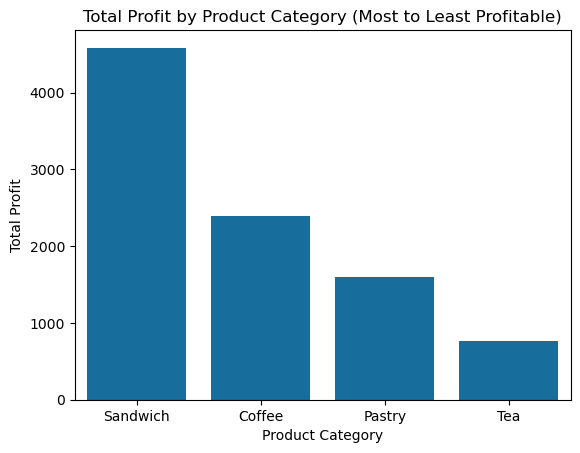

In [210]:
# Task 6: use sns.barplot() with aggregated data

#print(summary)
#print(summary.sort_values('total_profit', ascending = False))

summary = summary.sort_values('total_profit', ascending = False)

sns.barplot(summary['total_profit'])
plt.title('Total Profit by Product Category (Most to Least Profitable)')
plt.xlabel('Product Category')
plt.ylabel('Total Profit')
plt.show()

## Interpretation

Concisely answer the following questions based on your analysis.


1. What might go wrong if you did not verify the merge in Task 3 before proceeding with the analysis?
2. In Tasks 4 and 5, you aggregated data at different levels of detail (by category, then by category and location). How did this change what you could learn from the data?
3. Reflect on the patterns you discovered in your analysis. What valuable insights did your work generate?
4. The coffee shop owner asks: "Based on your analysis, what's the single most important thing I should do to improve profitability?" Provide a specific, actionable recommendation. Justify your recommendation with evidence from your analysis (include specific numbers from your results). Also, suggest additional analysis that you feel might be worthwhile.

### Your Answers

1. If you do no verification of the merge being done correctly you are operating on assumptions and may just think the data is bad, not that you did something incorrectly. You could also draw false conclusions if it merged improperly.
2. Once you start adding in location you can account for regional preferences. If people in the suburbs prefer a certain item or combination of items you could increase the price slightly or know to stock them maximize profits and optimize business. In the areas where you know something isn't selling you could decide to take it off the menu. If you are only look wholistically you don't have that level of granularity to know what each store or each region should be doing.
3. Despite the good volume and high margin per coffee sandwhiches stand out as the main profit driver for the business. The total profit brought in by tea is also much lower than any of the others.
4. The transaction count for sandwhiches in the suburbs and on campus are very low relative to total transactions. Downtown has a similar transaction count to campus but sells significantly more sandwhiches. Find a way to market sandwhiches as either something that is ready and on the go like a cup of coffee or a way to draw people in to sit for a bit at your shop. Sandwhich transactions are averaging \$5.60 on campus while only being 136 of the 1062 transactions and in the suburbs they are averaging \\$6.28 while being 158 of 593 transactions. The single most important thing is sell more sandwhiches, to add more granularity on campus represents 12.8% of transactions and should be focused on first. The suburbs are 26.6% of total transaction. The next step of analysis that would be recommended is breaking the categories down by item type to see if there is anything that is lagging and assess how each item impacts profitability.

## Bonus: Time-Based Analysis (Optional)

For extra credit, investigate a time-based question of your choosing. Examples of questions you could explore include:

- Do sales patterns differ between weekdays and weekends?
- Which hours are busiest at each location?
- Is there a day of the week that stands out for profitability?

For full credit you must:

- State your question clearly
- Show your analysis code
- Summarize what you found in 2-3 sentences

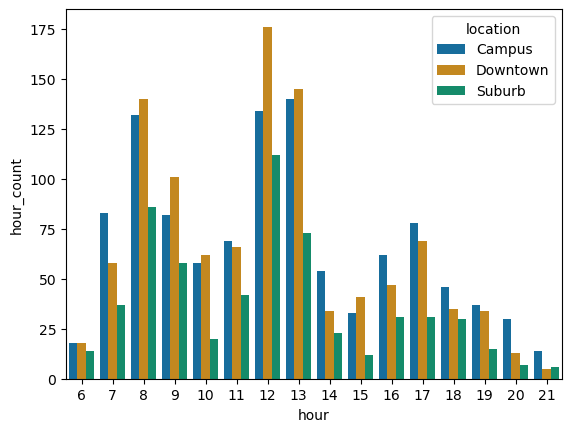

In [211]:
# Bonus: Your time-based analysis here
#determine which hours are busiest at each location.

#print(sales['location'].value_counts()) #3 locations exists
#print(sales['timestamp'].dt.hour.value_counts()) #code to separate out hours
sales['hour'] = sales['timestamp'].dt.hour #use dt.hour to extract the hour from the data frame
#sales.head()
ec_summary = sales.groupby(['location', 'hour']).agg(
    hour_count = ('hour', 'count')).reset_index()


#print(ec_summary)
sns.barplot(ec_summary, x = 'hour', y = 'hour_count', hue = 'location')
plt.show()
#print("Some brief findings from the graph are that the trends seems to remain consistent between locations, but Downtown is usually the busiest and the suburbs are usually the slowest. There appears to be an 8 AM rush that would align with before work, and a lunch rush. I am not sure what drives people in during dinner. Also on campus is busier at the early and late extremes which may be due to lifestyle requirements of students.")

### Your Findings

**Initial Question:** Determine which hours are the busiest at each location.

**Findings:** Some brief findings from the graph are that the trends seems to remain consistent between locations, but Downtown is usually the busiest and the suburbs are usually the slowest. There appears to be an 8 AM rush that would align with before work, and a lunch rush between 12 and 2. The lunch rush is the absolute busiest time at each location, but the breakfast rush does stand out as a large peak. I am not sure what drives people in during dinner. Also on campus is busier at the early and late extremes which may be due to lifestyle requirements of students.


## Submission

Ensure your notebook:

- Has the verification block (Banner ID and code) as the first cell
- Runs completely from top to bottom without errors
- Shows all task outputs clearly
- Includes all interpretation responses
- Is saved and committed to your repository

Follow the submission instructions on Canvas to submit your work.